Import potrzebnych bibliotek

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import xml
import os
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Pobranie potrzebnych danych

In [2]:
csv_list = list(os.listdir(r'C:\Users\Admin\Documents\Inżynierka\CSV_final'))

In [3]:
index = []
for i in csv_list:
    index.append(i[11:-4])


In [4]:
list_of_xrd = []
list_of_x_system = []
list_of_everything = []
use_cols_xrd = ['xstal_system', 'theta', 'intensity']

df_xrd = pd.DataFrame(columns=['y','theta', 'intensity'], index=index,)
df_xrd



,y,theta,intensity
00-001-0128,NaN,NaN,NaN
00-001-0478,NaN,NaN,NaN
00-001-0491,NaN,NaN,NaN
00-001-0508,NaN,NaN,NaN
00-001-0550,NaN,NaN,NaN
...,...,...,...
04-025-5495,NaN,NaN,NaN
04-025-7414,NaN,NaN,NaN
04-025-7475,NaN,NaN,NaN
05-001-0181,NaN,NaN,NaN


In [5]:
for i in csv_list:
    data = pd.read_csv(f'C:\\Users\\Admin\\Documents\\Inżynierka\\CSV_final\\{i}', usecols= use_cols_xrd)
    list_of_everything.append(data)
    df_xrd['y'][i] = data['xstal_system'][0]
    df_xrd['theta'][i] = data['theta']
    df_xrd['intensity'][i] = data['intensity']

df_xrd



,y,theta,intensity
00-001-0128,NaN,NaN,NaN
00-001-0478,NaN,NaN,NaN
00-001-0491,NaN,NaN,NaN
00-001-0508,NaN,NaN,NaN
00-001-0550,NaN,NaN,NaN
...,...,...,...
04-025-5495,NaN,NaN,NaN
04-025-7414,NaN,NaN,NaN
04-025-7475,NaN,NaN,NaN
05-001-0181,NaN,NaN,NaN


In [6]:
Y = []
for i in list_of_everything:
    Y.append(i['xstal_system'][0])

In [7]:
X_theta = []
X_intens = []
for i in list_of_everything:
    X_theta.append(i['theta'].dropna())
    X_intens.append(i['intensity'].dropna())
X_intens[200]

20    100
21     60
22      8
23     14
24      6
25     35
26      4
27      4
28      8
29      4
30      6
31     12
32      2
33      8
34      4
35      4
36      6
37     10
38      4
39      4
40     <1
41      4
42      2
43      4
44      2
45      2
46      4
47      4
48      2
49      4
50      4
Name: intensity, dtype: object

In [8]:
counter = 0
for i in index:

    df_xrd['y'][i] = Y[counter]
    df_xrd['theta'][i] = X_theta[counter]
    df_xrd['intensity'][i] = X_intens[counter]

    counter+=1


In [9]:
m = df_xrd['theta'][0]
n = df_xrd['intensity'][0]
example = pd.concat([m,n], axis=1)
example

,theta,intensity
0,13.59,100
1,16.78,100
2,19.20,100
3,21.14,80
4,27.59,100
5,30.92,60
6,34.88,40
7,37.12,40
8,40.23,20
9,42.19,10


In [10]:
df_xrd['chart'] = df_xrd['intensity']
df_xrd

,y,theta,intensity,chart
00-001-0128,Cubic,0 13.59 1 16.78 2 19.20 3 21.14 4 ...,0 100 1 100 2 100 3 80 4 100 5...,0 100 1 100 2 100 3 80 4 100 5...
00-001-0478,Orthorhombic,16 15.26 17 23.08 18 25.80 19 27.7...,16 31.0 17 100.0 18 31.0 19 50....,16 31.0 17 100.0 18 31.0 19 50....
00-001-0491,Cubic,0 19.98 1 23.45 2 28.40 3 34.8...,0 37 1 100 2 10 3 5 4 ...,0 37 1 100 2 10 3 5 4 ...
00-001-0508,Rhombohedral,21 18.51 22 24.16 23 28.31 24 37.4...,21 11.0 22 100.0 23 64.0 24 16....,21 11.0 22 100.0 23 64.0 24 16....
00-001-0550,Cubic,52 25.135 53 35.743 54 44.369 55 ...,52 100.0 53 50.0 54 100.0 55 50....,52 100.0 53 50.0 54 100.0 55 50....
...,...,...,...,...
04-025-5495,Triclinic (Anorthic),30 10.330 31 16.284 32 16.284 33 ...,30 29 31 530m 32 530m 33 8...,30 29 31 530m 32 530m 33 8...
04-025-7414,Triclinic (Anorthic),30 5.492 31 10.615 32 10.615 33 ...,30 1 31 1000m 32 1000m 33 ...,30 1 31 1000m 32 1000m 33 ...
04-025-7475,Triclinic (Anorthic),12 7.583 13 15.200 14 22.885 15 ...,12 5 13 368 14 3 15 7...,12 5 13 368 14 3 15 7...
05-001-0181,Triclinic (Anorthic),540 4.062 541 8.128 542 12.205 5...,540 33 541 7 542 24 543 28 54...,540 33 541 7 542 24 543 28 54...


In [11]:
for i in index:
    m = df_xrd['theta'][i]
    n = df_xrd['intensity'][i]
    example = pd.concat([m,n], axis=1)
    example.set_index(keys=[m], inplace=True)
    example_numpy =example.to_numpy()
    df_xrd['chart'][i] = example_numpy

In [12]:
for i in df_xrd['chart']:
    for k in i:
        if type(k[1]) == str and k[1][-1].isnumeric() == False:
            k[1] = float(k[:-1])
        elif type(k[1]) == str and k[1][0] == "<":
            k[1] = 0
        else:

            k[1] = float(k[1])

In [13]:
df_xrd

,y,theta,intensity,chart
00-001-0128,Cubic,0 13.59 1 16.78 2 19.20 3 21.14 4 ...,0 100 1 100 2 100 3 80 4 100 5...,"[[13.59, 100.0], [16.78, 100.0], [19.2, 100.0]..."
00-001-0478,Orthorhombic,16 15.26 17 23.08 18 25.80 19 27.7...,16 31.0 17 100.0 18 31.0 19 50....,"[[15.26, 31.0], [23.08, 100.0], [25.8, 31.0], ..."
00-001-0491,Cubic,0 19.98 1 23.45 2 28.40 3 34.8...,0 37 1 100 2 10 3 5 4 ...,"[[19.98, 37.0], [23.45, 100.0], [28.4, 10.0], ..."
00-001-0508,Rhombohedral,21 18.51 22 24.16 23 28.31 24 37.4...,21 11.0 22 100.0 23 64.0 24 16....,"[[18.51, 11.0], [24.16, 100.0], [28.31, 64.0],..."
00-001-0550,Cubic,52 25.135 53 35.743 54 44.369 55 ...,52 100.0 53 50.0 54 100.0 55 50....,"[[25.135, 100.0], [35.743, 50.0], [44.369, 100..."
...,...,...,...,...
04-025-5495,Triclinic (Anorthic),30 10.330 31 16.284 32 16.284 33 ...,30 29 31 530m 32 530m 33 8...,"[[10.33, 29.0], [16.284, 16.284], [16.284, 16...."
04-025-7414,Triclinic (Anorthic),30 5.492 31 10.615 32 10.615 33 ...,30 1 31 1000m 32 1000m 33 ...,"[[5.492, 1.0], [10.615, 10.615], [10.615, 10.6..."
04-025-7475,Triclinic (Anorthic),12 7.583 13 15.200 14 22.885 15 ...,12 5 13 368 14 3 15 7...,"[[7.583, 5.0], [15.2, 368.0], [22.885, 3.0], [..."
05-001-0181,Triclinic (Anorthic),540 4.062 541 8.128 542 12.205 5...,540 33 541 7 542 24 543 28 54...,"[[4.062, 33.0], [8.128, 7.0], [12.205, 24.0], ..."


Histogram przedstawiający ilość próbek w każdej klasie

In [14]:
hist_data = df_xrd['y'].value_counts()
hist_data.array

<PandasArray>
[158, 128, 127, 127, 126, 115, 97]
Length: 7, dtype: int64

In [15]:
hist_labels = df_xrd['y'].value_counts().index
hist_labels

Index(['Orthorhombic', 'Rhombohedral', 'Tetragonal', 'Monoclinic', 'Hexagonal',
       'Cubic', 'Triclinic (Anorthic)'],
      dtype='object')

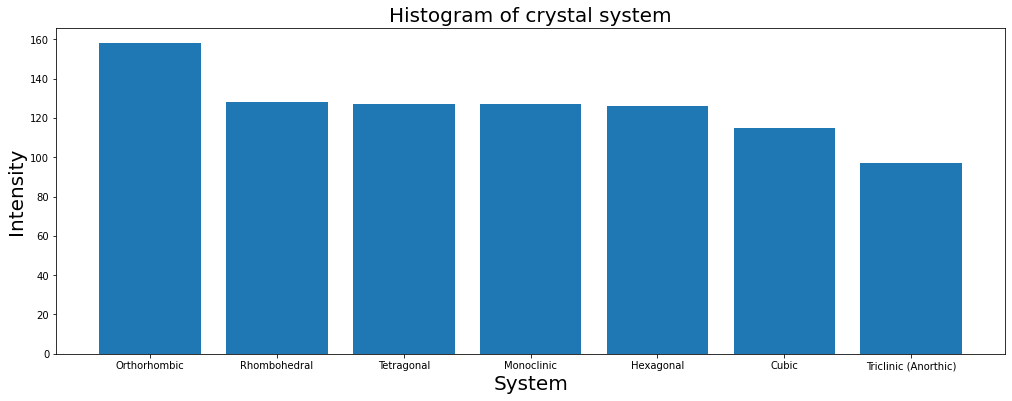

In [16]:
plt.figure(figsize=(17,6),)
plt.xlabel('System', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Histogram of crystal system', fontsize = 20)
plt.bar(hist_labels,hist_data, )
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\hist_of_x-system.png')


Wykres przedstawijący średnią ilość pików dla każdej klasy

In [17]:
Orthorhombic = []
Rhombohedral= []
Tetragonal= []
Monoclinic= []
Hexagonal= []
Cubic= []
Triclinic= []


for i, j in zip(df_xrd["y"], df_xrd["theta"]):
    if i == 'Orthorhombic':
        Orthorhombic.append(len(j))
    elif i == 'Rhombohedral':
        Rhombohedral.append(len(j))
    elif i == 'Tetragonal':
        Tetragonal.append(len(j))
    elif i == 'Monoclinic':
        Monoclinic.append(len(j))
    elif i == 'Hexagonal':
        Hexagonal.append(len(j))
    elif i == 'Cubic':
        Cubic.append(len(j))
    else :
        Triclinic.append(len(j))


In [18]:
def Average(lst):
    return sum(lst) / len(lst)

avarage_number_of_reflexes = [
Average(Orthorhombic),
Average(Rhombohedral),
Average(Tetragonal),
Average(Monoclinic),
Average(Hexagonal),
Average(Cubic),
Average(Triclinic),]



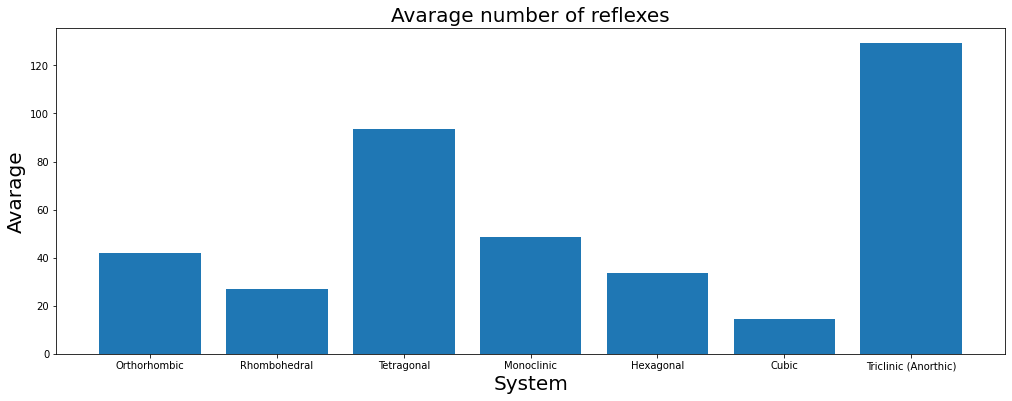

In [19]:
plt.figure(figsize=(17,6),)
plt.xlabel('System', fontsize = 20)

plt.ylabel('Avarage', fontsize = 20)
plt.title('Avarage number of reflexes', fontsize = 20)
plt.bar(hist_labels,avarage_number_of_reflexes, )
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\avarage_number_of_reflexes5.png')


Najmniejszy i największy kąt

In [20]:
df_xrd_ind = df_xrd.index

In [21]:
biggest = 0
smallest = 100
for i in df_xrd_ind:
    a = df_xrd['chart'][i]
    for j in a:
        if j[0]>biggest:
            biggest = j[0]
        elif j[0]<smallest:
            smallest = j[0]

In [22]:
print(smallest,biggest)

3.244 170.928


Histogram przedstawiający ilość pików dla każdego kąta dla wszystkich próbek



In [23]:
number_of_all_peaks = []
for i in range(0,172):
    number_of_all_peaks.append(0)
len(number_of_all_peaks)

172

In [24]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]

    for i in j:
        if int(i[0])<=i[0]<int(i[0]+1):
            number_of_all_peaks[int(i[0])]+=1

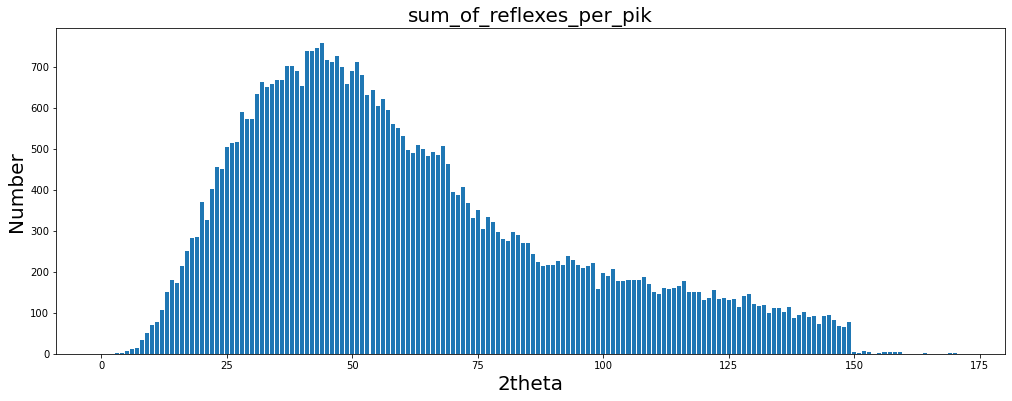

In [25]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik', fontsize = 20)
plt.bar(range(172), number_of_all_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik3.png')

Wykres dla układu Orthorhombic

In [26]:
number_of_Orthorhombic_peaks = []
for i in range(0,172):
    number_of_Orthorhombic_peaks.append(0)
len(number_of_Orthorhombic_peaks)

172

In [27]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Orthorhombic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                number_of_Orthorhombic_peaks[int(i[0])]+=1

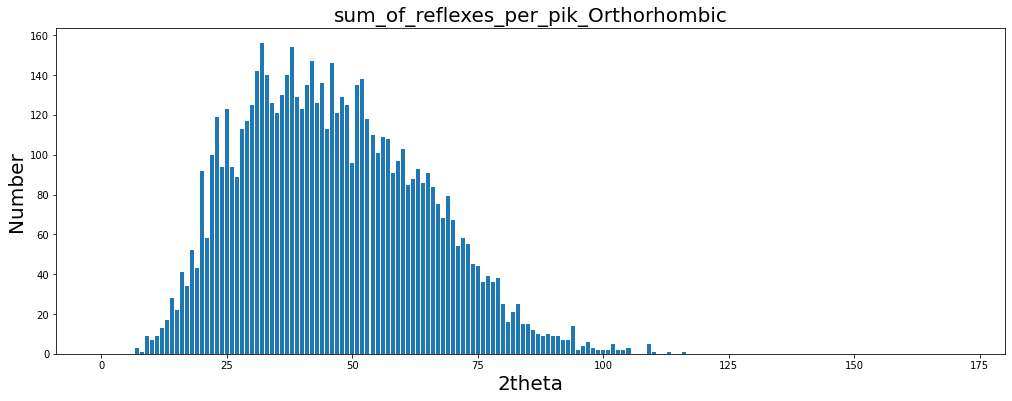

In [28]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik_Orthorhombic', fontsize = 20)
plt.bar(range(172), number_of_Orthorhombic_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik_Orthorhombic9.png')

Wykres dla układu Rhombohedral


In [29]:
number_of_Rhombohedral_peaks = []
for i in range(0,172):
    number_of_Rhombohedral_peaks.append(0)
len(number_of_Rhombohedral_peaks)

172

In [30]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Rhombohedral':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                number_of_Rhombohedral_peaks[int(i[0])]+=1

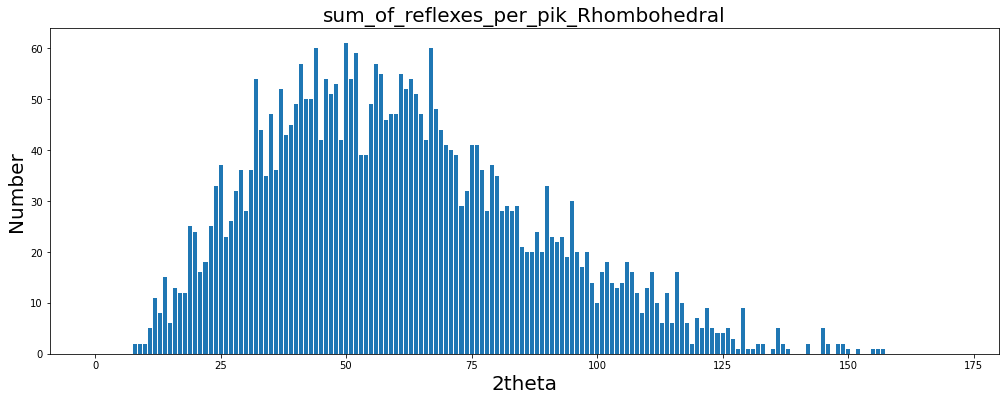

In [31]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik_Rhombohedral', fontsize = 20)
plt.bar(range(172), number_of_Rhombohedral_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik_Rhombohedral10.png')

Wykres dla układu Tetragonal

In [32]:
number_of_Tetragonal_peaks = []
for i in range(0,172):
    number_of_Tetragonal_peaks.append(0)
len(number_of_Tetragonal_peaks)

172

In [33]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Tetragonal':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                number_of_Tetragonal_peaks[int(i[0])]+=1

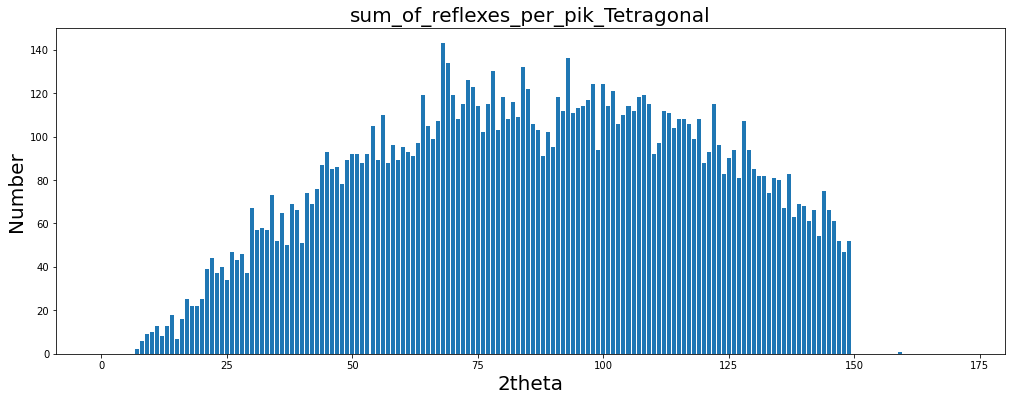

In [34]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik_Tetragonal', fontsize = 20)
plt.bar(range(172), number_of_Tetragonal_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik_Tetragonal9.png')

In [35]:
#number_of_Tetragonal_peaks

Wykres dla układu Monoclinic

In [36]:
number_of_Monoclinic_peaks = []
for i in range(0,172):
    number_of_Monoclinic_peaks.append(0)
len(number_of_Monoclinic_peaks)

172

In [37]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Monoclinic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                number_of_Monoclinic_peaks[int(i[0])]+=1

In [38]:
#number_of_Monoclinic_peaks

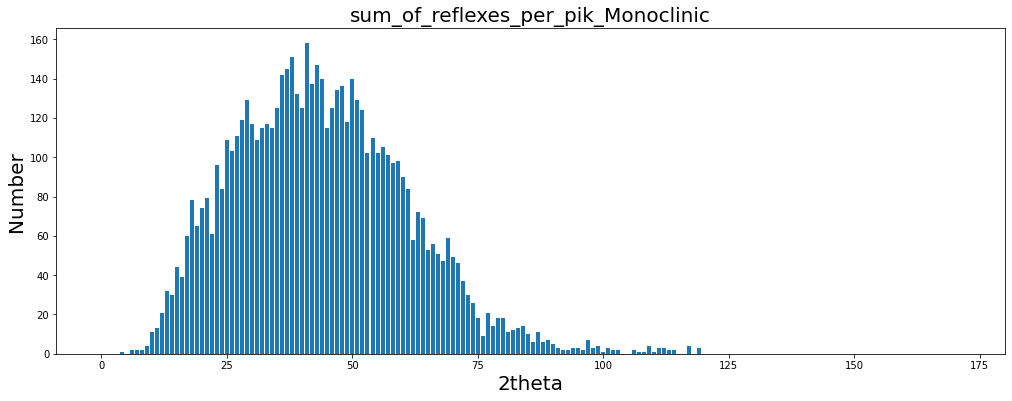

In [39]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik_Monoclinic', fontsize = 20)
plt.bar(range(172), number_of_Monoclinic_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik_Monoclinic9.png')

Wykres dla układu Hexagonal

In [40]:
number_of_Hexagonal_peaks = []
for i in range(0,172):
    number_of_Hexagonal_peaks.append(0)
len(number_of_Hexagonal_peaks)

172

In [41]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Hexagonal':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                number_of_Hexagonal_peaks[int(i[0])]+=1

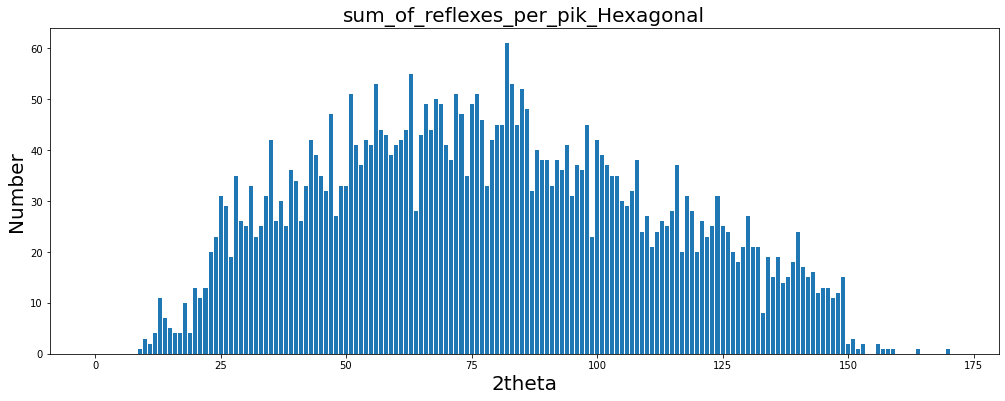

In [42]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik_Hexagonal', fontsize = 20)
plt.bar(range(172), number_of_Hexagonal_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik_Hexagonal9.png')

Wykres dla układu Cubic

In [43]:
number_of_Cubic_peaks = []
for i in range(0,172):
    number_of_Cubic_peaks.append(0)
len(number_of_Cubic_peaks)

172

In [44]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Cubic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                number_of_Cubic_peaks[int(i[0])]+=1

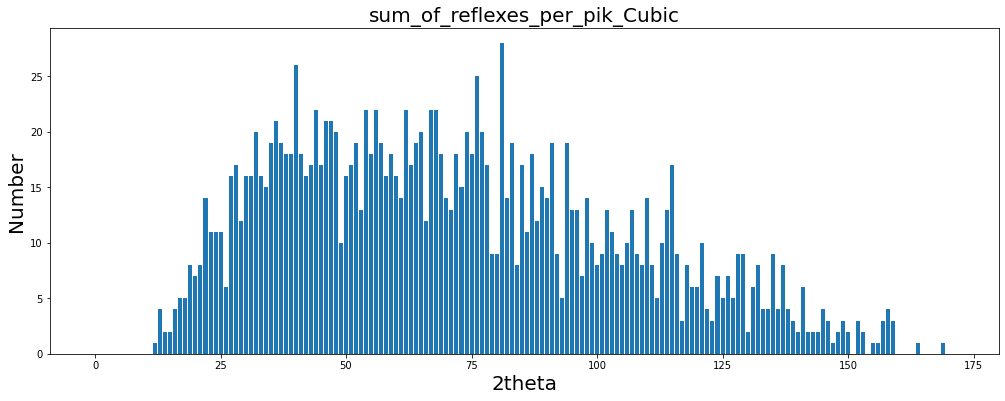

In [45]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik_Cubic', fontsize = 20)
plt.bar(range(172), number_of_Cubic_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik_Cubic9.png')

Wykres dla układu Triclinic

In [46]:
number_of_Triclinic_peaks = []
for i in range(0,172):
    number_of_Triclinic_peaks.append(0)
len(number_of_Triclinic_peaks)

172

In [47]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Triclinic (Anorthic)':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                number_of_Triclinic_peaks[int(i[0])]+=1

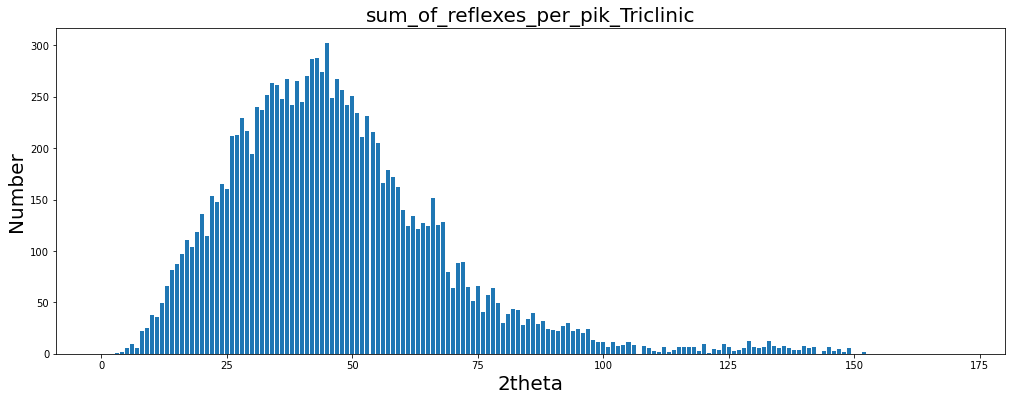

In [48]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('sum_of_reflexes_per_pik_Triclinic', fontsize = 20)
plt.bar(range(172), number_of_Triclinic_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\sum_of_reflexes_per_pik_Triclinic9.png')

In [49]:
#number_of_Triclinic_peaks



Średnia liczba pików dla każdego kąta

Standaryzacja danych lokalna. Maximum zawsze to 100



In [50]:
for i in df_xrd['chart']:
    local_values = []
    for k in i:
        local_values.append(k[1])
    if max(local_values)!= 100:
        for k in i:
            k[1] = round((k[1]/max(local_values))*100, 4)





Średnai wysokość piku


In [51]:
hihgest_peaks = []
for i in range(0,172):
    hihgest_peaks.append(0)
len(hihgest_peaks)

172

In [52]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]

    for i in j:
        if int(i[0])<=i[0]<int(i[0]+1):
            if i[1]>hihgest_peaks[int(i[0])]:
                hihgest_peaks[int(i[0])] = i[1]

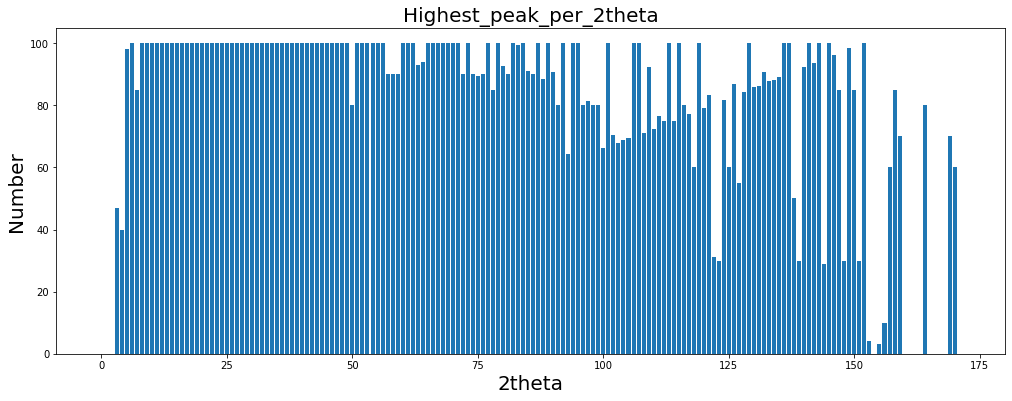

In [53]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2theta', fontsize = 20)
plt.bar(range(172), hihgest_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa9.png')

Najwyższe piki dla układu Orthorhombic

In [54]:
hihgest_peaks_Orthorhombi = []
for i in range(0,172):
    hihgest_peaks_Orthorhombi.append(0)
len(hihgest_peaks)

172

In [55]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Orthorhombic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                if i[1]>hihgest_peaks_Orthorhombi[int(i[0])]:
                    hihgest_peaks_Orthorhombi[int(i[0])] = i[1]

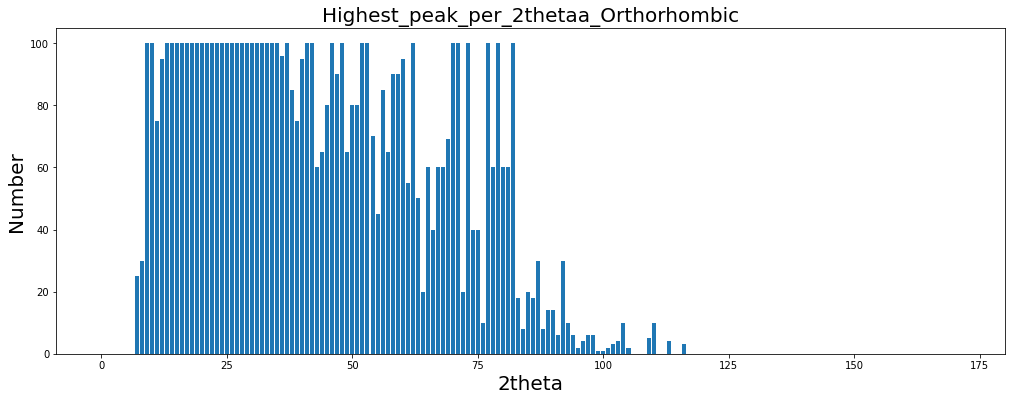

In [56]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2thetaa_Orthorhombic', fontsize = 20)
plt.bar(range(172), hihgest_peaks_Orthorhombi)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa_Orthorhombic9.png')

Najwyższe piki dla układu Rhombohedral

In [57]:
hihgest_peaks_Rhombohedral = []
for i in range(0,172):
    hihgest_peaks_Rhombohedral.append(0)
len(hihgest_peaks)

172

In [58]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Rhombohedral':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                if i[1]>hihgest_peaks_Rhombohedral[int(i[0])]:
                    hihgest_peaks_Rhombohedral[int(i[0])] = i[1]

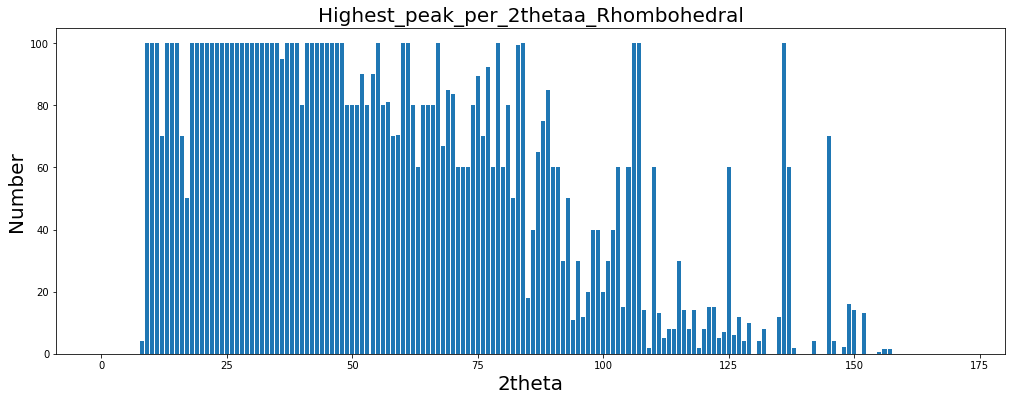

In [59]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2thetaa_Rhombohedral', fontsize = 20)
plt.bar(range(172), hihgest_peaks_Rhombohedral)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa_Rhombohedral9.png')

Najwyższe piki dla układu Tetragonal

In [60]:
hihgest_peaks_Tetragonal = []
for i in range(0,172):
    hihgest_peaks_Tetragonal.append(0)
len(hihgest_peaks)

172

In [61]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Tetragonal':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                if i[1]>hihgest_peaks_Tetragonal[int(i[0])]:
                    hihgest_peaks_Tetragonal[int(i[0])] = i[1]

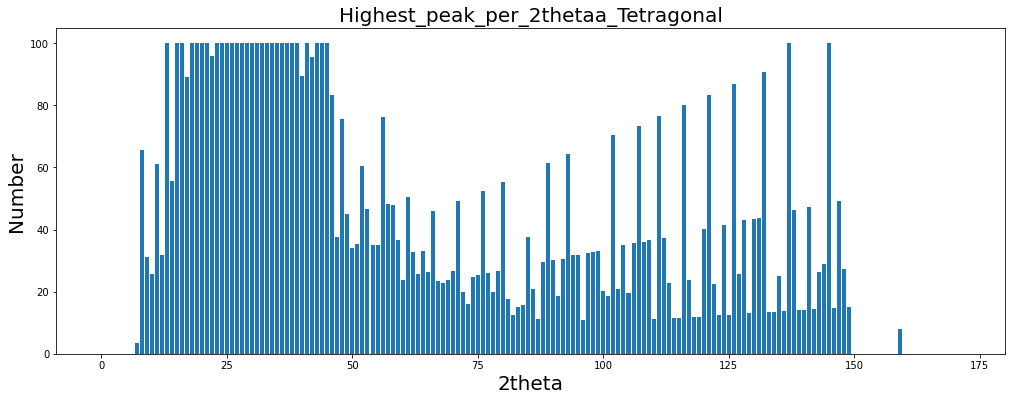

In [62]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2thetaa_Tetragonal', fontsize = 20)
plt.bar(range(172), hihgest_peaks_Tetragonal)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa_Tetragonal9.png')

Najwyższe piki dla układu Monoclinic

In [63]:
hihgest_peaks_Monoclinic = []
for i in range(0,172):
    hihgest_peaks_Monoclinic.append(0)
len(hihgest_peaks)

172

In [64]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Monoclinic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                if i[1]>hihgest_peaks_Monoclinic[int(i[0])]:
                    hihgest_peaks_Monoclinic[int(i[0])] = i[1]

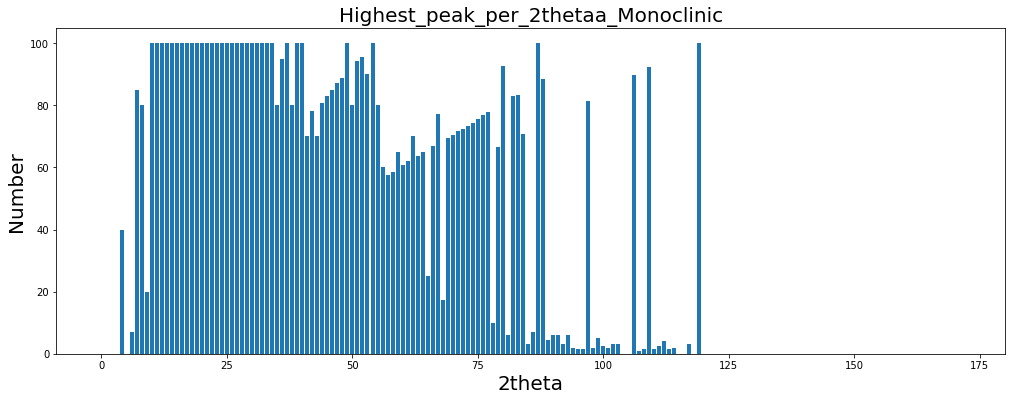

In [65]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2thetaa_Monoclinic', fontsize = 20)
plt.bar(range(172), hihgest_peaks_Monoclinic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa_Monoclinic9.png')

Najwyższe piki dla układu Hexagonal

In [66]:
hihgest_peaks_Hexagonal = []
for i in range(0,172):
    hihgest_peaks_Hexagonal.append(0)
len(hihgest_peaks)

172

In [67]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Hexagonal':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                if i[1]>hihgest_peaks_Hexagonal[int(i[0])]:
                    hihgest_peaks_Hexagonal[int(i[0])] = i[1]

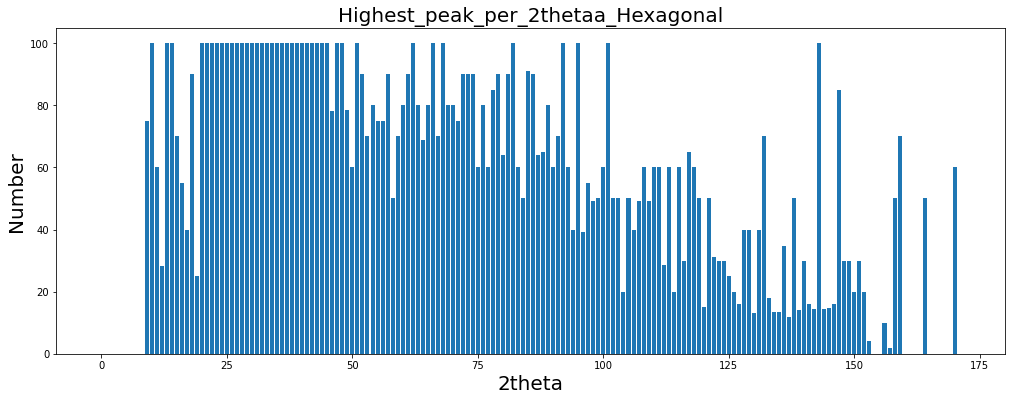

In [68]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2thetaa_Hexagonal', fontsize = 20)
plt.bar(range(172), hihgest_peaks_Hexagonal)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa_Hexagonal9.png')

Najwyższe piki dla układu Cubic

In [69]:
hihgest_peaks_Cubic = []
for i in range(0,172):
    hihgest_peaks_Cubic.append(0)
len(hihgest_peaks)

172

In [70]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Cubic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                if i[1]>hihgest_peaks_Cubic[int(i[0])]:
                    hihgest_peaks_Cubic[int(i[0])] = i[1]

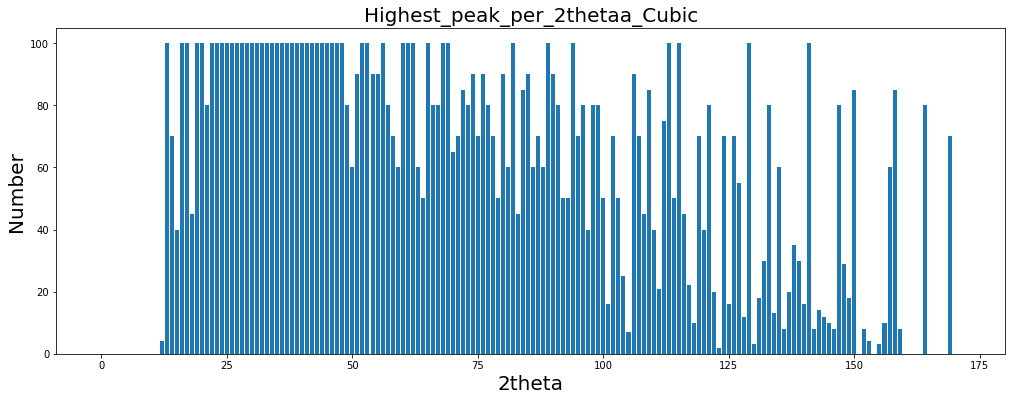

In [71]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2thetaa_Cubic', fontsize = 20)
plt.bar(range(172), hihgest_peaks_Cubic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa_Cubic29.png')

Najwyższe piki dla układu Triclinic)

In [72]:
hihgest_peaks_Triclinic = []
for i in range(0,172):
    hihgest_peaks_Triclinic.append(0)
len(hihgest_peaks)

172

In [73]:
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Triclinic (Anorthic)':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                if i[1]>hihgest_peaks_Triclinic[int(i[0])]:
                    hihgest_peaks_Triclinic[int(i[0])] = i[1]

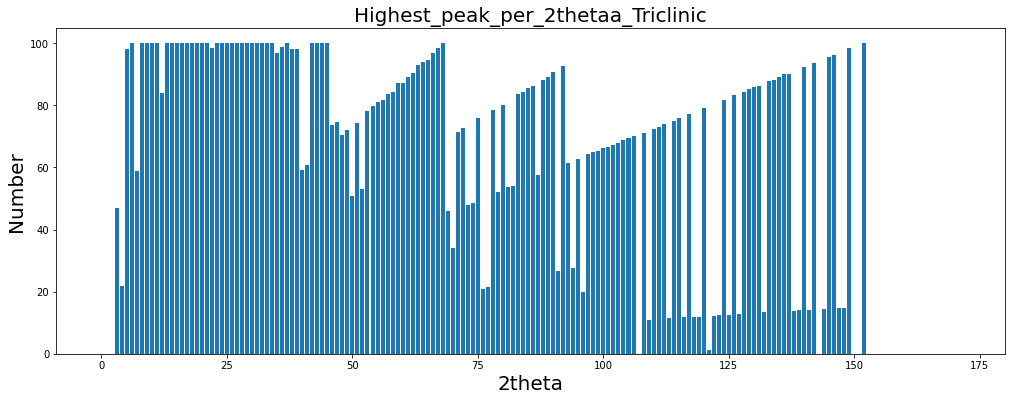

In [74]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Highest_peak_per_2thetaa_Triclinic', fontsize = 20)
plt.bar(range(172), hihgest_peaks_Triclinic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Highest_peak_per_2thetaa_Triclinicc9.png')

Średnia wysokość piku

In [75]:
def Average_advanced(lst, num_samples):
    return sum(lst) / num_samples

In [76]:
list_of_height_peaks = []
for i in range(0,172):
    list_of_height_peaks.append([])

avarange_height_peaks = []
for i in range(0,172):
    avarange_height_peaks.append(0)


In [77]:
num_samples = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    for i in j:
        if int(i[0])<=i[0]<int(i[0]+1):
            list_of_height_peaks[int(i[0])].append(i[1])
    num_samples+=1

In [78]:
for i in range(0,172):
    j = list_of_height_peaks[i]
    avarange_height_peaks[i] = round(Average_advanced(j, num_samples),3)


In [79]:
#avarange_height_peaks

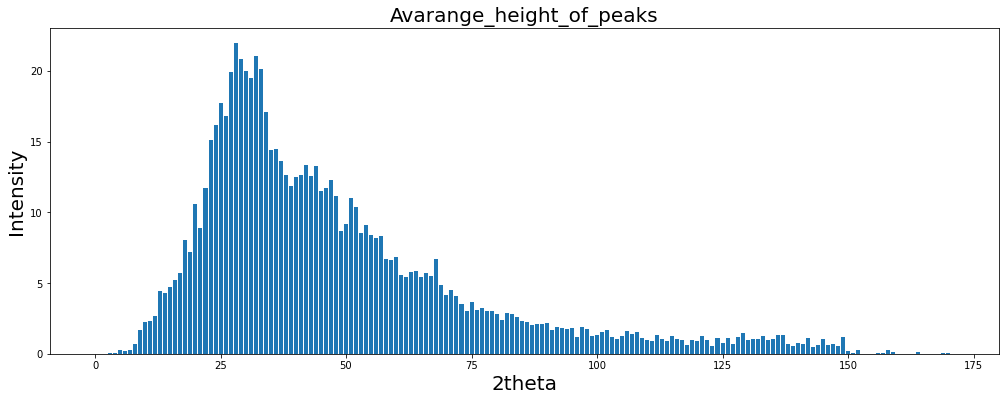

In [80]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks', fontsize = 20)
plt.bar(range(172), avarange_height_peaks)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks29.png')

Średnia wysokość pików dla układu Orthorhombic

In [81]:
list_of_height_peaks_Orthorhombic = []
for i in range(0,172):
    list_of_height_peaks_Orthorhombic.append([])

avarange_height_peaks_Orthorhombic = []
for i in range(0,172):
    avarange_height_peaks_Orthorhombic.append(0)



In [82]:
num_samples_Orthorhombic = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Orthorhombic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                list_of_height_peaks_Orthorhombic[int(i[0])].append(i[1])
    num_samples_Orthorhombic +=1

In [83]:
for i in range(0,172):
    j = list_of_height_peaks_Orthorhombic[i]
    avarange_height_peaks_Orthorhombic[i] = round(Average_advanced(j, num_samples_Orthorhombic),3)


In [84]:
#avarange_height_peaks

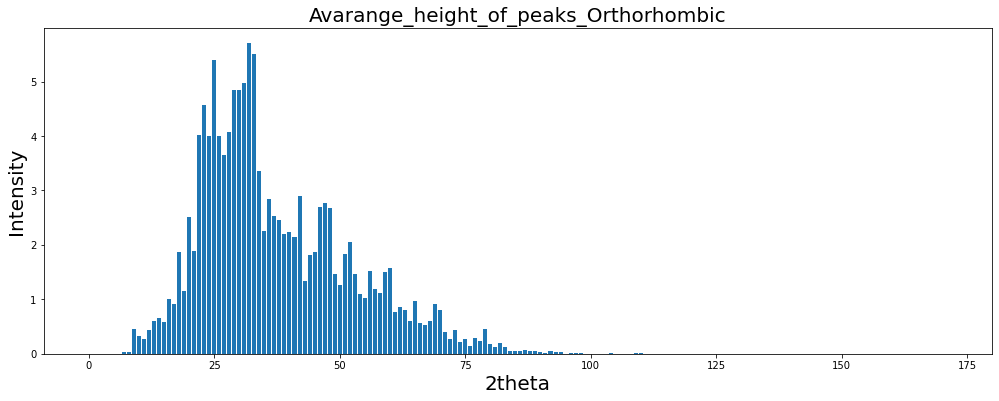

In [85]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks_Orthorhombic', fontsize = 20)
plt.bar(range(172), avarange_height_peaks_Orthorhombic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks_Orthorhombic30.png')

Średnia wysokość pików dla układu Rhombohedral

In [86]:
list_of_height_peaks_Rhombohedral = []
for i in range(0,172):
    list_of_height_peaks_Rhombohedral.append([])

avarange_height_peaks_Rhombohedral = []
for i in range(0,172):
    avarange_height_peaks_Rhombohedral.append(0)


In [87]:
num_samples_Rhombohedral = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Rhombohedral':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                list_of_height_peaks_Rhombohedral[int(i[0])].append(i[1])
    num_samples_Rhombohedral +=1

In [88]:
for i in range(0,172):
    j = list_of_height_peaks_Rhombohedral[i]
    avarange_height_peaks_Rhombohedral[i] = round(Average_advanced(j, num_samples_Rhombohedral),3)


In [89]:
#avarange_height_peaks

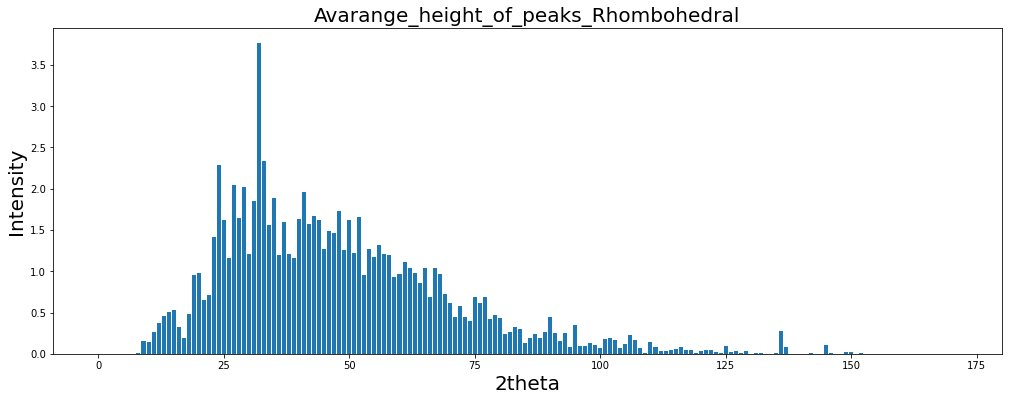

In [90]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks_Rhombohedral', fontsize = 20)
plt.bar(range(172), avarange_height_peaks_Rhombohedral)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks_Rhombohedra29.png')

Średnia wysokość pików dla układu Tetragonal


In [91]:
list_of_height_peaks_Tetragonal = []
for i in range(0,172):
    list_of_height_peaks_Tetragonal.append([])

avarange_height_peaks_Tetragonal = []
for i in range(0,172):
    avarange_height_peaks_Tetragonal.append(0)


In [92]:
num_samples_Tetragonal = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Tetragonal':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                list_of_height_peaks_Tetragonal[int(i[0])].append(i[1])
    num_samples_Tetragonal +=1

In [93]:
for i in range(0,172):
    j = list_of_height_peaks_Tetragonal[i]
    avarange_height_peaks_Tetragonal[i] = round(Average_advanced(j, num_samples_Tetragonal),3)


In [94]:
#avarange_height_peaks

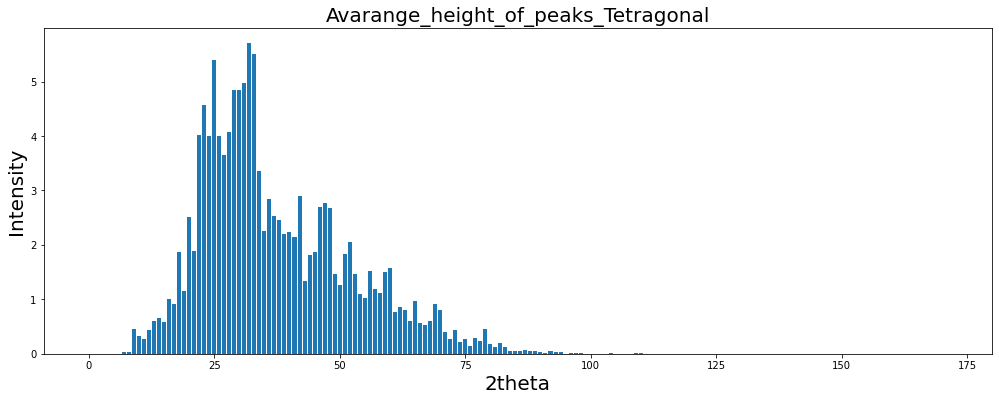

In [95]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks_Tetragonal', fontsize = 20)
plt.bar(range(172), avarange_height_peaks_Orthorhombic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks_Tetragonal10.png')

Średnia wysokość pików dla układu Monoclinic


In [96]:
list_of_height_peaks_Monoclinic = []
for i in range(0,172):
    list_of_height_peaks_Monoclinic.append([])

avarange_height_peaks_Monoclinic = []
for i in range(0,172):
    avarange_height_peaks_Monoclinic.append(0)


In [97]:
num_samples_Monoclinic = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Monoclinic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                list_of_height_peaks_Monoclinic[int(i[0])].append(i[1])
    num_samples_Monoclinic +=1

In [98]:
for i in range(0,172):
    j = list_of_height_peaks_Monoclinic[i]
    avarange_height_peaks_Monoclinic[i] = round(Average_advanced(j, num_samples_Monoclinic),3)


In [99]:
#avarange_height_peaks

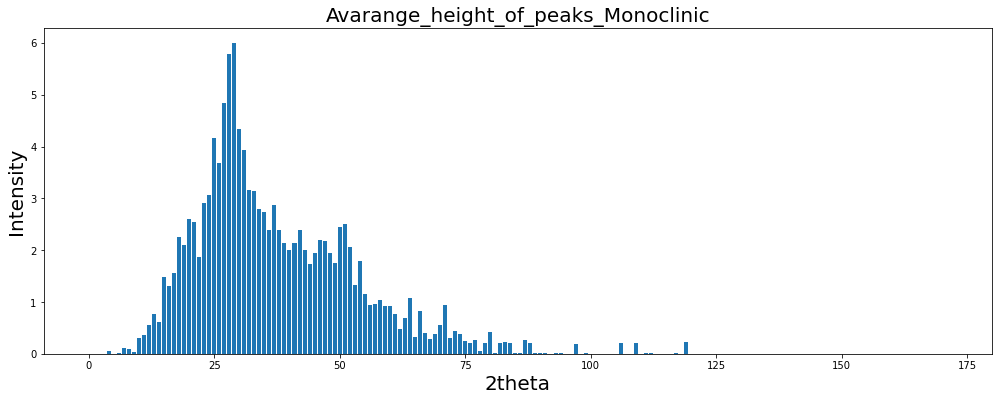

In [100]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks_Monoclinic', fontsize = 20)
plt.bar(range(172), avarange_height_peaks_Monoclinic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks_Monoclinic29.png')

Średnia wysokość pików dla układu Hexagonal


In [101]:
list_of_height_peaks_Hexagonal = []
for i in range(0,172):
    list_of_height_peaks_Hexagonal.append([])

avarange_height_peaks_Hexagonal = []
for i in range(0,172):
    avarange_height_peaks_Hexagonal.append(0)


In [102]:
num_samples_Hexagonal = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Hexagonal':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                list_of_height_peaks_Hexagonal[int(i[0])].append(i[1])
    num_samples_Hexagonal +=1

In [103]:
for i in range(0,172):
    j = list_of_height_peaks_Hexagonal[i]
    avarange_height_peaks_Hexagonal[i] = round(Average_advanced(j, num_samples_Hexagonal),3)


In [104]:
#avarange_height_peaks

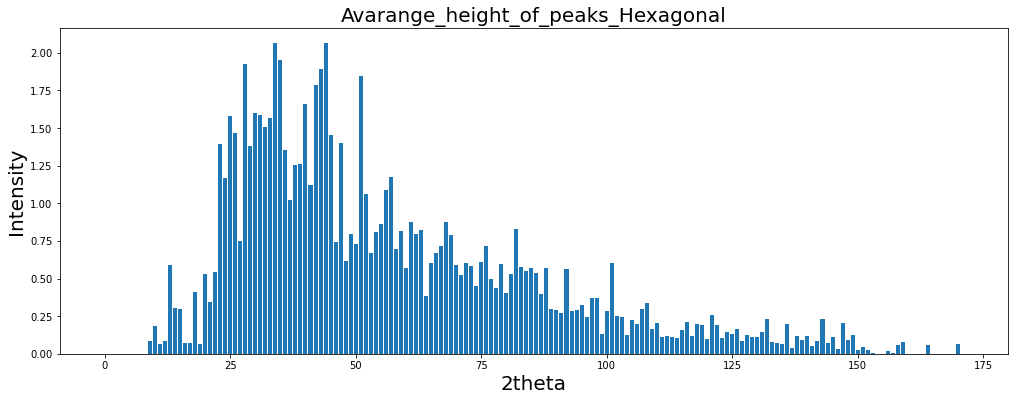

In [105]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks_Hexagonal', fontsize = 20)
plt.bar(range(172), avarange_height_peaks_Hexagonal)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks_Hexagonal29.png')

Średnia wysokość pików dla układu Cubic


In [106]:
list_of_height_peaks_Cubic = []
for i in range(0,172):
    list_of_height_peaks_Cubic.append([])

avarange_height_peaks_Cubic = []
for i in range(0,172):
    avarange_height_peaks_Cubic.append(0)


In [107]:
num_samples_Cubic = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Cubic':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                list_of_height_peaks_Cubic[int(i[0])].append(i[1])
    num_samples_Cubic +=1

In [108]:
for i in range(0,172):
    j = list_of_height_peaks_Cubic[i]
    avarange_height_peaks_Cubic[i] = round(Average_advanced(j, num_samples_Cubic),3)



In [109]:
#avarange_height_peaks

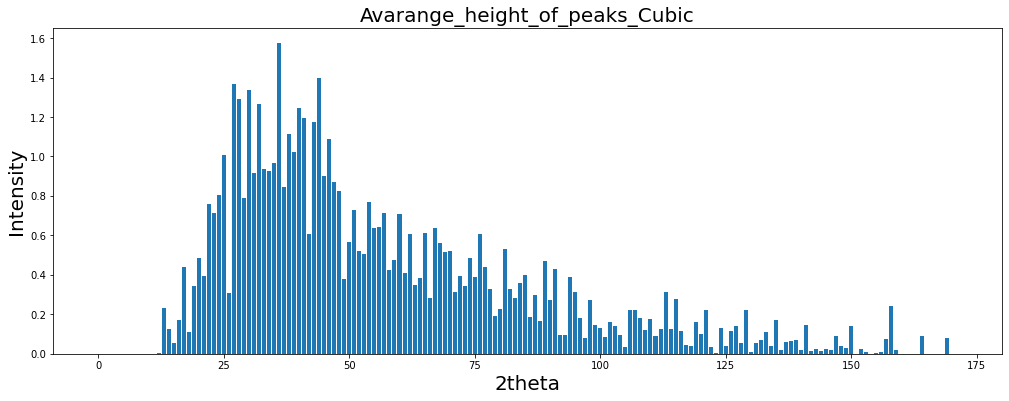

In [110]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks_Cubic', fontsize = 20)
plt.bar(range(172), avarange_height_peaks_Cubic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks_Cubic29.png')

Średnia wysokość pików dla układu Triclinic

In [111]:
list_of_height_peaks_Triclinic = []
for i in range(0,172):
    list_of_height_peaks_Triclinic.append([])

avarange_height_peaks_Triclinic = []
for i in range(0,172):
    avarange_height_peaks_Triclinic.append(0)


In [112]:
num_samples_Triclinic = 0
for x in df_xrd_ind:
    j = df_xrd['chart'][x]
    if df_xrd['y'][x] == 'Triclinic (Anorthic)':
        for i in j:
            if int(i[0])<=i[0]<int(i[0]+1):
                list_of_height_peaks_Triclinic[int(i[0])].append(i[1])
    num_samples_Triclinic +=1

In [113]:
for i in range(0,172):
    j = list_of_height_peaks_Triclinic[i]
    avarange_height_peaks_Triclinic[i] = round(Average_advanced(j, num_samples_Triclinic),3)



In [114]:
#avarange_height_peaks

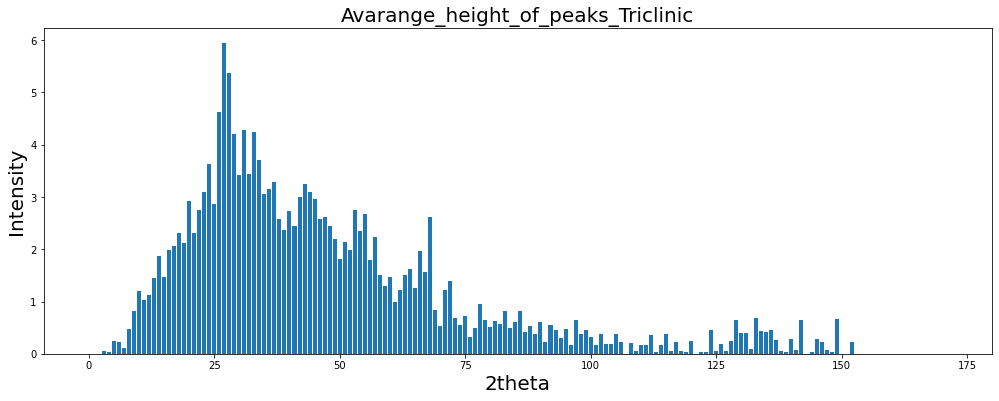

In [115]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_height_of_peaks_Triclinic', fontsize = 20)
plt.bar(range(172), avarange_height_peaks_Triclinic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_height_of_peaks_Triclinic10.png')


Średnia liczba pików

In [116]:
avarage_number_of_reflexes_list = []
for i in range(0,172):
    avarage_number_of_reflexes_list.append(0)



In [117]:
len(number_of_all_peaks)

172

In [118]:
for i in range(172):
    avarage_number_of_reflexes_list[i] = round(number_of_all_peaks[i]/len(number_of_all_peaks),3)

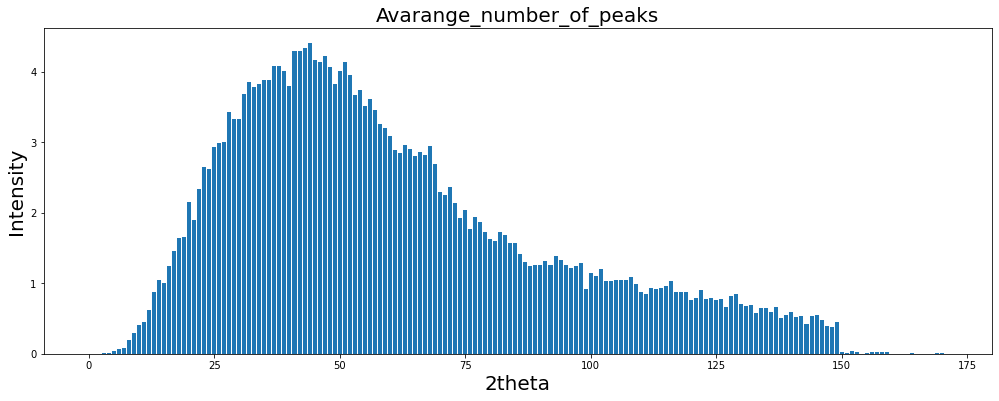

In [119]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Intensity', fontsize = 20)
plt.title('Avarange_number_of_peaks', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks9.png')


Średnia liczba pików dla układu Orthorhombic danego kąta


In [120]:
avarage_number_of_reflexes_list_Orthorhombic = []
for i in range(0,172):
    avarage_number_of_reflexes_list_Orthorhombic.append(0)


In [121]:
len(number_of_all_peaks)

172

In [122]:
for i in range(172):
    avarage_number_of_reflexes_list_Orthorhombic[i] = round(number_of_Orthorhombic_peaks[i]/len(number_of_Orthorhombic_peaks),3)

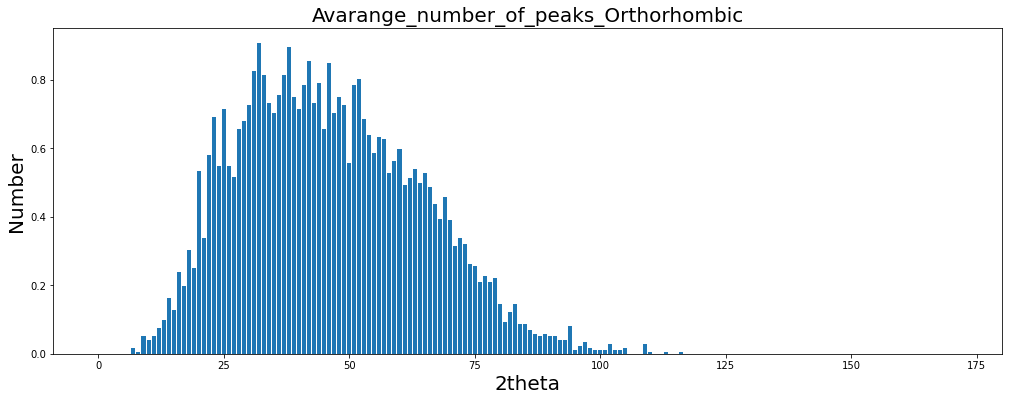

In [123]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Avarange_number_of_peaks_Orthorhombic', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list_Orthorhombic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks_Orthorhombic9.png')

Średnia liczba pików dla układu Rhombohedral danego kąta


In [124]:
avarage_number_of_reflexes_list_Rhombohedral = []
for i in range(0,172):
    avarage_number_of_reflexes_list_Rhombohedral.append(0)


In [125]:
len(number_of_all_peaks)

172

In [126]:
for i in range(172):
    avarage_number_of_reflexes_list_Rhombohedral[i] = round(number_of_Rhombohedral_peaks[i]/len(number_of_Orthorhombic_peaks),3)

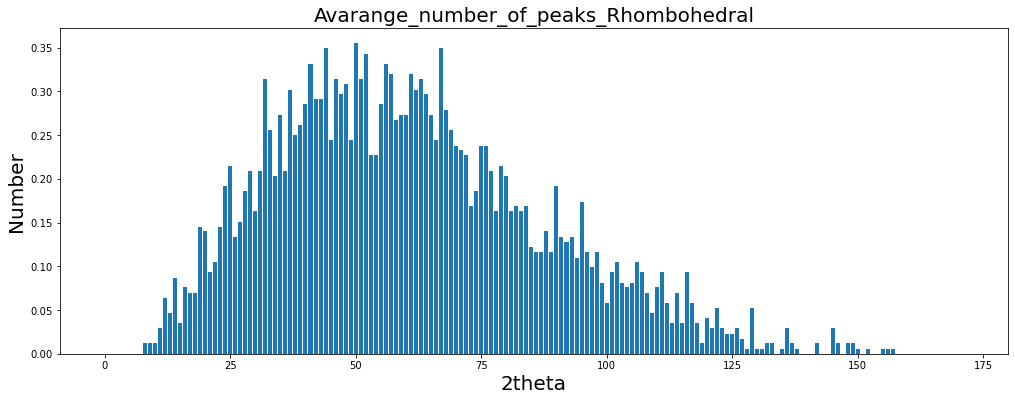

In [127]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Avarange_number_of_peaks_Rhombohedral', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list_Rhombohedral)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks_Rhombohedral9.png')

Średnia liczba pików dla układu Tetragonal danego kąta

In [128]:
avarage_number_of_reflexes_list_Tetragonal = []
for i in range(0,172):
    avarage_number_of_reflexes_list_Tetragonal.append(0)


In [129]:
len(number_of_all_peaks)

172

In [130]:
for i in range(172):
    avarage_number_of_reflexes_list_Tetragonal[i] = round(number_of_Tetragonal_peaks[i]/len(number_of_Tetragonal_peaks),3)

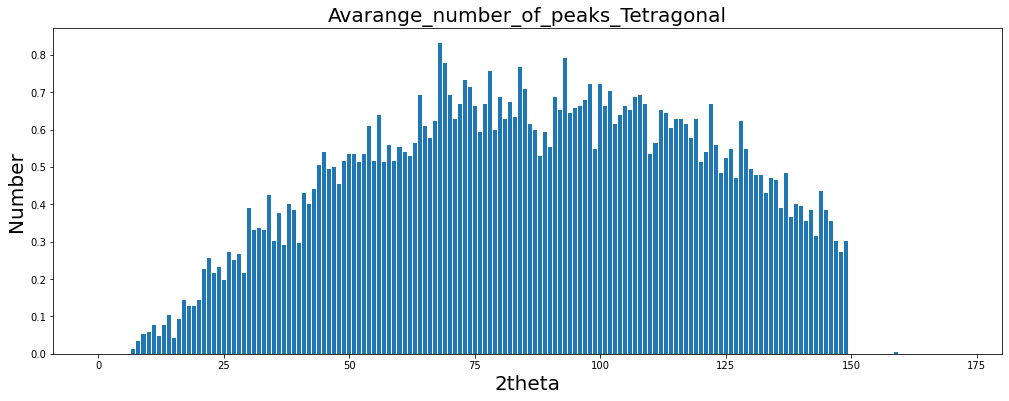

In [131]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Avarange_number_of_peaks_Tetragonal', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list_Tetragonal)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks_Tetragonal9.png')

Średnia liczba pików dla układu Monoclinic danego kąta

In [132]:
avarage_number_of_reflexes_list_Monoclinic = []
for i in range(0,172):
    avarage_number_of_reflexes_list_Monoclinic.append(0)


In [133]:
len(number_of_all_peaks)

172

In [134]:
for i in range(172):
    avarage_number_of_reflexes_list_Monoclinic[i] = round(number_of_Monoclinic_peaks[i]/len(number_of_Monoclinic_peaks),3)

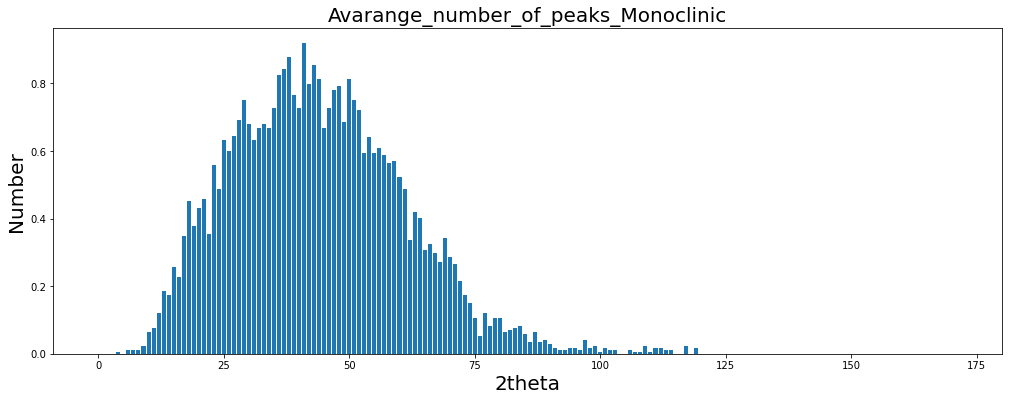

In [135]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Avarange_number_of_peaks_Monoclinic', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list_Monoclinic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks_Monoclinic9.png')

Średnia liczba pików dla układu Hexagonal danego kąta

In [136]:
avarage_number_of_reflexes_list_Hexagonal = []
for i in range(0,172):
    avarage_number_of_reflexes_list_Hexagonal.append(0)


In [137]:
len(number_of_all_peaks)

172

In [138]:
for i in range(172):
    avarage_number_of_reflexes_list_Hexagonal[i] = round(number_of_Hexagonal_peaks[i]/len(number_of_Hexagonal_peaks),3)

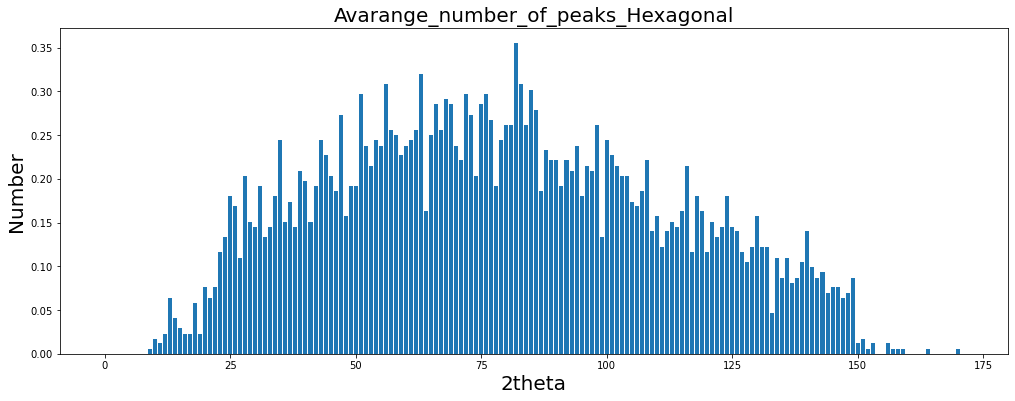

In [139]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Avarange_number_of_peaks_Hexagonal', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list_Hexagonal)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks_Hexagonal9.png')

Średnia liczba pików dla układu Cubic dla danego kąta

In [140]:
avarage_number_of_reflexes_list_Cubic = []
for i in range(0,172):
    avarage_number_of_reflexes_list_Cubic.append(0)


In [141]:
len(number_of_all_peaks)

172

In [142]:
for i in range(172):
    avarage_number_of_reflexes_list_Cubic[i] = round(number_of_Cubic_peaks[i]/len(number_of_Cubic_peaks),3)

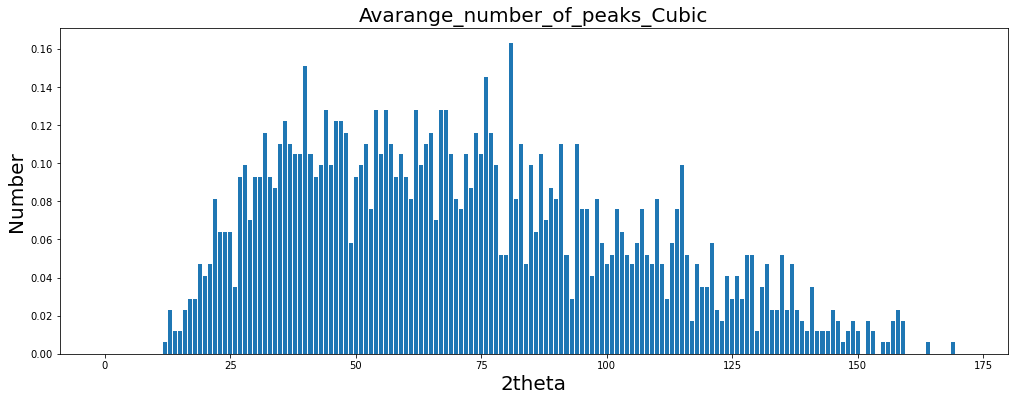

In [143]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Avarange_number_of_peaks_Cubic', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list_Cubic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks_Cubic9.png')

Średnia liczba pików dla układu Triclinic dla danego kąta

In [144]:
avarage_number_of_reflexes_list_Triclinic = []
for i in range(0,172):
    avarage_number_of_reflexes_list_Triclinic.append(0)


In [145]:
len(number_of_all_peaks)

172

In [146]:
for i in range(172):
    avarage_number_of_reflexes_list_Triclinic[i] = round(number_of_Triclinic_peaks[i]/len(number_of_Triclinic_peaks),3)

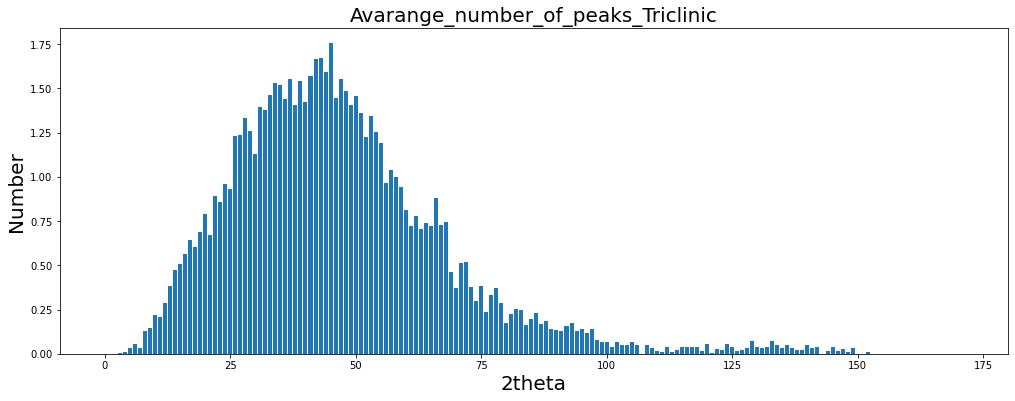

In [147]:
plt.figure(figsize=(17,6),)
plt.xlabel('2theta', fontsize = 20)

plt.ylabel('Number', fontsize = 20)
plt.title('Avarange_number_of_peaks_Triclinic', fontsize = 20)
plt.bar(range(172), avarage_number_of_reflexes_list_Triclinic)
plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\Avarange_number_of_peaks_Triclinic9.png')
